<a href="https://colab.research.google.com/github/meriembenchaaben/UtilityOfDomainModelCompletion-replicationPackage/blob/main/scripts/plotDemographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import gensim
from gensim.models import Word2Vec
import os
import re
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
df = pd.read_csv('/content/gdrive/MyDrive/UserStudy/Exit questionnaire.csv')
df

,Timestamp,Participant ID,Primary background\n,Age,Gender,Location (country)\n,Current position,Familiarity with UML Class Diagrams\nHow experienced are you with UML Class Diagrams?\n
0,5/1/2023 21:20:08,1,STEM,24,Male,Canada,Master's student,Learned about UML Class Diagrams
1,5/1/2023 22:59:05,2,STEM,25,Male,Canada,Master's student,Used UML Class Diagrams in a classroom exercise
2,5/2/2023 20:56:00,3,STEM,27,Female,Canada,PhD student,Used UML Class Diagrams in a classroom exercis...
3,5/3/2023 18:03:01,4,STEM,26,Female,Canada,Master's student,Used UML Class Diagrams in a project (school o...
4,5/3/2023 21:18:11,5,STEM,33,Female,Canada,PhD student,Used UML Class Diagrams in a classroom exercise
5,5/5/2023 20:01:56,7,STEM,32,Male,Canada,PhD student,Used UML Class Diagrams occasionally at work
6,5/5/2023 21:00:13,8,STEM,26,Male,Montreal,PhD student,Used UML Class Diagrams occasionally at work
7,5/5/2023 22:06:35,9,STEM,26,Male,Canada,Master's student,I use UML Class Diagrams frequently at work
8,5/5/2023 23:56:32,10,STEM,26,Male,Montreal,Master's student,"Learned about UML Class Diagrams, Used UML Cla..."
9,5/6/2023 16:33:39,11,STEM,24,Female,Montreal,Master's student,"Used UML Class Diagrams occasionally at work, ..."


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is loaded into a DataFrame named 'df'
# You would replace this line with the code to load your data



# 2. Pie Chart for Gender Distribution
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Participants')
plt.ylabel('')  # This removes the 'Gender' label on the y-axis
plt.show()



# 4. Bar Chart for Educational Backgrounds
plt.figure(figsize=(10, 6))
df['Current position'].value_counts().plot(kind='bar', color='orange')
plt.title('Educational Backgrounds of Participants')
plt.xlabel('Current Position')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()


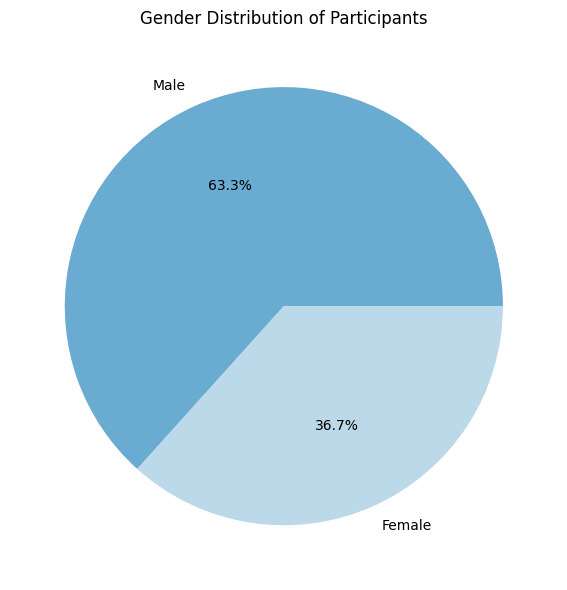

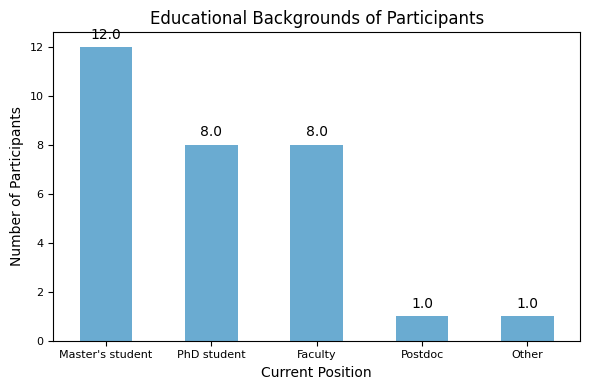

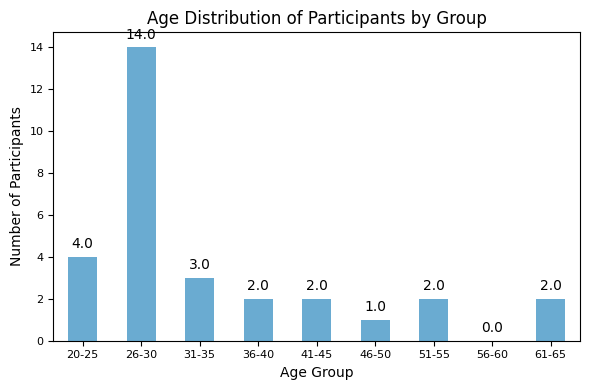

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assuming data is loaded into a DataFrame named 'df'
# You would replace this line with the code to load your data
# df = pd.read_csv('path_to_your_data.csv')

# Define age bins and labels
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Uniform color for all plots
plot_color = '#6aabd1'

# Set the directory to save files
save_dir = '/content/gdrive/MyDrive/UserStudy/'

# Pie Chart for Gender Distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[plot_color, '#bcd9ea'])
plt.title('Gender Distribution of Participants', fontsize=12)
plt.ylabel('')  # This removes the 'Gender' label on the y-axis
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Gender_Distribution.png'))  # Save the plot
plt.show()
plt.close()

# Bar Chart for Educational Backgrounds
plt.figure(figsize=(6, 4))
bars = df['Current position'].value_counts().plot(kind='bar', color=plot_color)
plt.title('Educational Backgrounds of Participants', fontsize=12)
plt.xlabel('Current Position', fontsize=10)
plt.ylabel('Number of Participants', fontsize=10)
plt.xticks(fontsize=8, ha='center', rotation=0)
plt.yticks(fontsize=8)
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Educational_Backgrounds.png'))  # Save the plot
plt.show()
plt.close()

# Bar Chart for Age Distribution
plt.figure(figsize=(6, 4))
bars = df['Age Group'].value_counts().sort_index().plot(kind='bar', color=plot_color)
plt.title('Age Distribution of Participants by Group', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Participants', fontsize=10)
plt.xticks(fontsize=8, ha='center', rotation=0)
plt.yticks(fontsize=8)
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Age_Distribution.png'))  # Save the plot
plt.show()
plt.close()


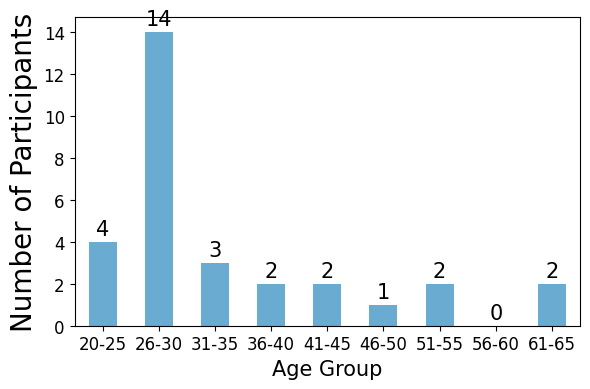

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assuming data is loaded into a DataFrame named 'df'
# You would replace this line with the code to load your data
# df = pd.read_csv('path_to_your_data.csv')

# Define age bins and labels
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Uniform color for all plots
plot_color = '#6aabd1'

# Set the directory to save files
save_dir = '/content/gdrive/MyDrive/UserStudy/'

# Pie Chart for Gender Distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[plot_color, '#bcd9ea'],fontsize=20)
#plt.title('Gender Distribution of Participants', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Gender_Distribution.png'))  # Save the plot
plt.close()

# Bar Chart for Educational Backgrounds
plt.figure(figsize=(6, 4))
bars = df['Current position'].value_counts().plot(kind='bar', color=plot_color)
#plt.title('Educational Backgrounds of Participants', fontsize=12)
plt.xlabel('Current Position', fontsize=20)
plt.ylabel('Number of Participants', fontsize=20)
plt.xticks(fontsize=8, ha='center', rotation=0)
plt.yticks(fontsize=10)
for p in bars.patches:
    bars.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Educational_Backgrounds.png'))  # Save the plot
plt.close()

# Bar Chart for Age Distribution
plt.figure(figsize=(6, 4))
bars = df['Age Group'].value_counts().sort_index().plot(kind='bar', color=plot_color)
#plt.title('Age Distribution of Participants by Group', fontsize=12)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Number of Participants', fontsize=20)
plt.xticks(fontsize=12, ha='center', rotation=0)
plt.yticks(fontsize=12)
for p in bars.patches:
    bars.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points', fontsize=15)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(save_dir, 'Age_Distribution.png'))  # Save the plot
plt.close()

